In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
url = "https://www.worldometers.info/coronavirus/"

In [3]:
resp = requests.get(url).content.decode()

In [4]:
soup = BeautifulSoup(resp,"html.parser")

In [5]:
world_data = soup.find("tbody").find_all("tr")

In [6]:
complete_data = list()
for i in range(8,len(world_data)):
    data = []
    list_data = world_data[i].find_all("td")
    for i in list_data:
        data.append(i.text)
    complete_data.append(data)

In [7]:
complete_data[0]

['1',
 'USA',
 '95,970,007',
 '',
 '1,068,843 ',
 '',
 '91,419,363',
 '',
 '3,481,801',
 '3,992',
 '',
 '',
 '1,099,287,365',
 '',
 ' ',
 'North America',
 '',
 '',
 '',
 '',
 '',
 '']

In [8]:
mapped_data = list(map(lambda x: x[1:10] + [x[12]] +[x[14]],complete_data))

In [9]:
column_names = ["Name",
                "Total Cases",
                "New Cases",
                "Total Deaths",
                "New Deaths",
                "Total Recovered",
                "New Recovered",
                "Active Cases",
                "Serious Cases",
                "Total Tests",
                "Population"]

In [10]:
mapped_data[0]

['USA',
 '95,970,007',
 '',
 '1,068,843 ',
 '',
 '91,419,363',
 '',
 '3,481,801',
 '3,992',
 '1,099,287,365',
 ' ']

In [11]:
import pandas as pd

df = pd.DataFrame(mapped_data, columns = column_names)
df.to_csv("covid-data aug 27.csv", index = False)

In [12]:
pd.read_csv('covid-data aug 27.csv')

,Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Total Tests,Population
0,USA,"95,970,007",NaN,"1,068,843",NaN,"91,419,363",NaN,"3,481,801","3,992","1,099,287,365",
1,India,"44,398,696",NaN,"527,597",NaN,"43,783,788",NaN,"87,311",698,"884,339,045","1,409,125,225"
2,France,"34,446,854",NaN,"153,857",NaN,"33,899,183",NaN,"393,814",869,"271,490,188","65,583,425"
3,Brazil,"34,368,909",NaN,"683,464",NaN,"33,360,772",NaN,"324,673","8,318","63,776,166","215,802,191"
4,Germany,"32,041,348",NaN,"147,104",NaN,"31,047,000","+18,200","847,244","1,406","122,332,384","84,358,806"
...,...,...,...,...,...,...,...,...,...,...,...
225,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,NaN,"628,866"
226,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,
227,Tuvalu,8,NaN,,NaN,NaN,NaN,8,NaN,NaN,"12,104"
228,Saint Helena,7,NaN,,NaN,2,NaN,5,NaN,NaN,"6,116"


In [13]:
import csv

with open("covid-data.csv","w",newline = "") as csvfile:
    fout = csv.writer(csvfile,delimiter = ",")
    fout.writerow(column_names)
    fout.writerows(mapped_data)

In [14]:
import pandas as pd

df = pd.read_csv('covid-data.csv')

In [15]:
df

,Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Total Tests,Population
0,USA,"95,970,007",NaN,"1,068,843",NaN,"91,419,363",NaN,"3,481,801","3,992","1,099,287,365",
1,India,"44,398,696",NaN,"527,597",NaN,"43,783,788",NaN,"87,311",698,"884,339,045","1,409,125,225"
2,France,"34,446,854",NaN,"153,857",NaN,"33,899,183",NaN,"393,814",869,"271,490,188","65,583,425"
3,Brazil,"34,368,909",NaN,"683,464",NaN,"33,360,772",NaN,"324,673","8,318","63,776,166","215,802,191"
4,Germany,"32,041,348",NaN,"147,104",NaN,"31,047,000","+18,200","847,244","1,406","122,332,384","84,358,806"
...,...,...,...,...,...,...,...,...,...,...,...
225,Western Sahara,10,NaN,1,NaN,9,NaN,0,NaN,NaN,"628,866"
226,MS Zaandam,9,NaN,2,NaN,7,NaN,0,NaN,NaN,
227,Tuvalu,8,NaN,,NaN,NaN,NaN,8,NaN,NaN,"12,104"
228,Saint Helena,7,NaN,,NaN,2,NaN,5,NaN,NaN,"6,116"


In [16]:
df.isnull().sum()

Name                 0
Total Cases          0
New Cases          197
Total Deaths         0
New Deaths         206
Total Recovered     19
New Recovered      192
Active Cases        18
Serious Cases       81
Total Tests         16
Population           0
dtype: int64

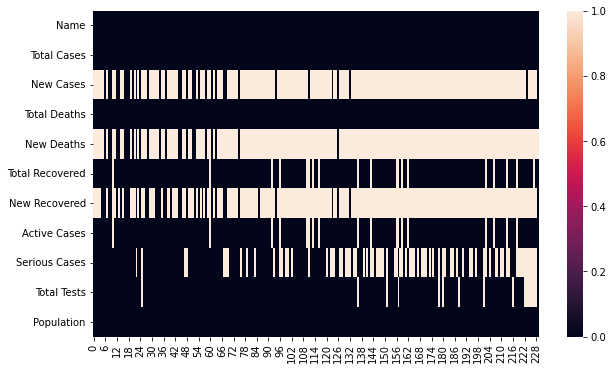

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose())
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)